# Basic Data Tools: Pandas

The Pandas package introduces a very powerful tool for working with data in python : Dataframe. Each column represents a different type of data. The columns are named as well, so we will know what does each entry in that column signify. Each row also represents a different entry in data

In [64]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [21]:
companies = ['Jane Street', 'Citadel', 'Two Sigma', 'Goldman Sachs', 'Morgan Stanley']
Employees = [1200,1400,1600,40500,68000]
company_type = ['Propreitary Trading', 'Hedge Fund', 'Hedge Fund', 'Investment Bank', 'Investment Bank']

comp_df = pd.DataFrame({'Industry Type':company_type,'Number of Employees':Employees}, index = companies)
comp_df

,Industry Type,Number of Employees
Jane Street,Propreitary Trading,1200
Citadel,Hedge Fund,1400
Two Sigma,Hedge Fund,1600
Goldman Sachs,Investment Bank,40500
Morgan Stanley,Investment Bank,68000


In [22]:
comp_df = pd.DataFrame(list(zip(company_type,Employees)),columns = ['Industry Type','Number of Employees'], index = companies)
comp_df #another way of creating dataframe

,Industry Type,Number of Employees
Jane Street,Propreitary Trading,1200
Citadel,Hedge Fund,1400
Two Sigma,Hedge Fund,1600
Goldman Sachs,Investment Bank,40500
Morgan Stanley,Investment Bank,68000


Dataframe has similarities to both dictionary and numpy nd-array. We can retrive a column from a dataframe by using its name, just as we used to retrive an item from dictionary using its key


In [23]:
comp_df['Number of Employees'] 

Jane Street        1200
Citadel            1400
Two Sigma          1600
Goldman Sachs     40500
Morgan Stanley    68000
Name: Number of Employees, dtype: int64

In [24]:
comp_df.shape #gives us rows and columns in dataframe

(5, 2)

Just like we saw retriving columns by using its name, rows can also be accessed using **loc** method:-

In [25]:
comp_df.loc['Two Sigma'] #displaying the row Two Sigma

Industry Type          Hedge Fund
Number of Employees          1600
Name: Two Sigma, dtype: object

In [26]:
comp_df.loc['Two Sigma','Number of Employees'] #number of employees in two sigma retrived

1600

In [27]:
comp_df.loc['Two Sigma':'Morgan Stanley','Number of Employees'] #slicing a subsection

Two Sigma          1600
Goldman Sachs     40500
Morgan Stanley    68000
Name: Number of Employees, dtype: int64

Adding a new row and column in dataframe is also quite simple and analogous to working with a dictionary. Similar is the case with dropping columns as well. Let us take a look at few examples:-

In [28]:
comp_df['Attrition(in %)'] = [10,12,15,20,25] #an example of adding a column
comp_df

,Industry Type,Number of Employees,Attrition(in %)
Jane Street,Propreitary Trading,1200,10
Citadel,Hedge Fund,1400,12
Two Sigma,Hedge Fund,1600,15
Goldman Sachs,Investment Bank,40500,20
Morgan Stanley,Investment Bank,68000,25


In [29]:
comp_df.loc['JP Morgan',:] = ['Investment Bank',100000,20] #adding a row
comp_df

,Industry Type,Number of Employees,Attrition(in %)
Jane Street,Propreitary Trading,1200.0,10.0
Citadel,Hedge Fund,1400.0,12.0
Two Sigma,Hedge Fund,1600.0,15.0
Goldman Sachs,Investment Bank,40500.0,20.0
Morgan Stanley,Investment Bank,68000.0,25.0
JP Morgan,Investment Bank,100000.0,20.0


In [30]:
comp_df.drop('Attrition(in %)',axis = 1, inplace = True) #dropping a column
comp_df

,Industry Type,Number of Employees
Jane Street,Propreitary Trading,1200.0
Citadel,Hedge Fund,1400.0
Two Sigma,Hedge Fund,1600.0
Goldman Sachs,Investment Bank,40500.0
Morgan Stanley,Investment Bank,68000.0
JP Morgan,Investment Bank,100000.0


In [87]:
comp_df.sort_values(['Number of Employees'], ascending = False) #sorting a column

,Industry Type,Number of Employees
JP Morgan,Investment Bank,100000.0
Morgan Stanley,Investment Bank,68000.0
Goldman Sachs,Investment Bank,40500.0
Two Sigma,Hedge Fund,1600.0
Citadel,Hedge Fund,1400.0
Jane Street,Propreitary Trading,1200.0


Another interesting feature of Pandas is that it can be used to scrape data through websites. We will use it to get data from **yahoo finance** to get stock prices of a few companies and then will learn about some dataframe operations and applying functions to it 

In [31]:
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

In [32]:

# download dataframe
FAANG_data = pdr.get_data_yahoo("FB AAPL AMZN NFLX GOOG", start="2020-01-01", end="2021-08-30")
#generally when we have a very large data, to get a feel for a data we generally display first few entries in dataframe

FAANG_data.head()

[*********************100%***********************]  5 of 5 completed


Adj Close                                                    \
                 AAPL         AMZN          FB         GOOG        NFLX   
Date                                                                      
2020-01-02  74.096443  1898.010010  209.779999  1367.369995  329.809998   
2020-01-03  73.376083  1874.969971  208.669998  1360.660034  325.899994   
2020-01-06  73.960770  1902.880005  212.600006  1394.209961  335.829987   
2020-01-07  73.612930  1906.859985  213.059998  1393.339966  330.750000   
2020-01-08  74.797081  1891.969971  215.220001  1404.319946  339.260010   

                Close                                                    ...  \
                 AAPL         AMZN          FB         GOOG        NFLX  ...   
Date                                                                     ...   
2020-01-02  75.087502  1898.010010  209.779999  1367.369995  329.809998  ...   
2020-01-03  74.357498  1874.969971  208.669998  1360.660034  325.899994  ...   
2020-01-06  74.949997  1902.880005  212.600006  1394.209961  335.829987  ...   
2020-01-07  74.597504  1906.859985  213.059998  1393.339966  330.750000  ...   
2020-01-08  75.797501  1891.969971  215.220001  1404.319946  339.260010  ...   

                 Open                                                    \
                 AAPL         AMZN          FB         GOOG        NFLX   
Date                                                                      
2020-01-02  74.059998  1875.000000  206.750000  1341.550049  326.100006   
2020-01-03  74.287498  1864.500000  207.210007  1347.859985  326.779999   
2020-01-06  73.447502  1860.000000  206.699997  1350.000000  323.119995   
2020-01-07  74.959999  1904.500000  212.820007  1397.939941  336.470001   
2020-01-08  74.290001  1898.040039  213.000000  1392.079956  331.489990   

               Volume                                       
                 AAPL     AMZN        FB     GOOG     NFLX  
Date                                                        
2020-01-02  135480400  4029000  12077100  1406600  4485800  
2020-01-03  146322800  3764400  11188400  1186400  3806900  
2020-01-06  118387200  4061800  17058900  1732300  5663100  
2020-01-07  108872000  4044900  14912400  1502700  4703200  
2020-01-08  132079200  3508000  13475000  1528000  7104500  

[5 rows x 30 columns]

In [33]:
FAANG_data = FAANG_data.Close #getting closing prices for each of the stock
FAANG_data.head()

,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2020-01-02,75.087502,1898.010010,209.779999,1367.369995,329.809998
2020-01-03,74.357498,1874.969971,208.669998,1360.660034,325.899994
2020-01-06,74.949997,1902.880005,212.600006,1394.209961,335.829987
2020-01-07,74.597504,1906.859985,213.059998,1393.339966,330.750000
2020-01-08,75.797501,1891.969971,215.220001,1404.319946,339.260010


<AxesSubplot:xlabel='Date'>

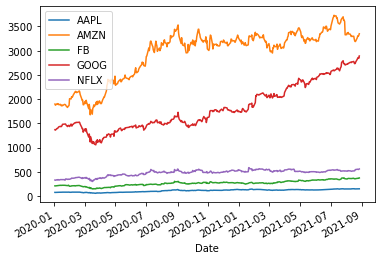

In [34]:
FAANG_data.plot() #plot of stock prices

# Operations on DataFrames:-

One of the important functionalities in Pandas in filtering dataframes. Often we want to work with a subset of data, based on some criteria. Let us take a look at few examples:-

In [35]:
print(FAANG_data.shape) 
FAANG_data_filtered = FAANG_data[(FAANG_data['AMZN'] < 3000) & (FAANG_data['GOOG'] < 2500)]
print(FAANG_data_filtered.shape)

(418, 5)
(135, 5)


Normally in python, we use **and**, **or** while writing programs. In Pandas, we will have to use bitwise operations which are as follows:-

& - and <br>
or - | <br>
not - ~ <br>

In [36]:
FAANG_data_filtered.tail()

,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2020-09-18,106.839996,2954.909912,252.529999,1459.989990,469.959991
2020-09-21,110.080002,2960.469971,248.149994,1431.160034,487.350006
2020-09-23,107.120003,2999.860107,249.020004,1415.209961,470.609985
2021-03-04,120.129997,2977.570068,257.640015,2049.090088,511.290009
2021-03-08,116.360001,2951.949951,255.309998,2024.170044,493.329987


In [37]:
comp_df[comp_df['Industry Type'].str.contains('Hedge')] #filtering with strings

,Industry Type,Number of Employees
Citadel,Hedge Fund,1400.0
Two Sigma,Hedge Fund,1600.0


We can apply numpy mathematical functions to dataframes as well, which we will take a look:-

In [38]:
FAANG_data_log = np.log(FAANG_data) #applying log transformation to each of the values
FAANG_data_log.head()

,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2020-01-02,4.318654,7.548561,5.346059,7.220644,5.798517
2020-01-03,4.308885,7.536348,5.340754,7.215725,5.786591
2020-01-06,4.316821,7.551124,5.359412,7.240083,5.816605
2020-01-07,4.312107,7.553213,5.361574,7.239459,5.801363
2020-01-08,4.328065,7.545374,5.371661,7.247308,5.826767


In [39]:
FAANG_data_exp_NFLX = FAANG_data.copy()
FAANG_data_exp_NFLX['NFLX'] = np.log(FAANG_data_exp_NFLX['NFLX']) #applying transformation on a single column
FAANG_data_exp_NFLX.head()

,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2020-01-02,75.087502,1898.010010,209.779999,1367.369995,5.798517
2020-01-03,74.357498,1874.969971,208.669998,1360.660034,5.786591
2020-01-06,74.949997,1902.880005,212.600006,1394.209961,5.816605
2020-01-07,74.597504,1906.859985,213.059998,1393.339966,5.801363
2020-01-08,75.797501,1891.969971,215.220001,1404.319946,5.826767


Often times, while doing data analysis...we would like to take a look at statistics of the numerical data such as its mean, median and if there are any null values in data. This is done by using describe function:-

In [40]:
FAANG_data.describe()

,AAPL,AMZN,FB,GOOG,NFLX
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,110.331053,2925.789013,264.651196,1811.157306,476.758756
std,25.780368,532.528519,53.179714,471.833537,64.627349
min,56.092499,1676.609985,146.009995,1056.619995,298.839996
25%,81.285624,2475.099976,229.347500,1451.264984,436.320000
50%,118.855000,3148.089966,266.619995,1647.309998,496.034988
75%,130.079994,3286.632446,298.125000,2126.707520,522.282486
max,151.119995,3731.409912,373.279999,2891.010010,586.340027


In [41]:
#renaming columns
FAANG_data.columns = ['Apple','Amazon','Facebook','Google','Netflix']
FAANG_data.head()

,Apple,Amazon,Facebook,Google,Netflix
Date,,,,,
2020-01-02,75.087502,1898.010010,209.779999,1367.369995,329.809998
2020-01-03,74.357498,1874.969971,208.669998,1360.660034,325.899994
2020-01-06,74.949997,1902.880005,212.600006,1394.209961,335.829987
2020-01-07,74.597504,1906.859985,213.059998,1393.339966,330.750000
2020-01-08,75.797501,1891.969971,215.220001,1404.319946,339.260010


In [42]:
FAANG_data>2000 #how filtering works essentially

,Apple,Amazon,Facebook,Google,Netflix
Date,,,,,
2020-01-02,False,False,False,False,False
2020-01-03,False,False,False,False,False
2020-01-06,False,False,False,False,False
2020-01-07,False,False,False,False,False
2020-01-08,False,False,False,False,False
...,...,...,...,...,...
2021-08-23,False,True,False,True,False
2021-08-24,False,True,False,True,False
2021-08-25,False,True,False,True,False


We can often use multiple filter operations followed by selections in a single command to performm our task, it becomes very convenient. Lets see an example:-

In [43]:
FAANG_data[FAANG_data.index<pd.to_datetime('2021-01-01')][['Apple','Google']].tail()

,Apple,Google
Date,,
2020-12-24,131.970001,1738.849976
2020-12-28,136.690002,1776.089966
2020-12-29,134.869995,1758.719971
2020-12-30,133.720001,1739.520020
2020-12-31,132.690002,1751.880005


We can use apply function to perform operations on rows. Its a pythonic way of doing it, instead of writing loops. Lets see a couple of examples:-

In [44]:
def high_price(x,y):
    if (x+y)//2>1600:
        return 'Yes'
    else:
        return 'No'

In [45]:
FAANG_data.head()

,Apple,Amazon,Facebook,Google,Netflix
Date,,,,,
2020-01-02,75.087502,1898.010010,209.779999,1367.369995,329.809998
2020-01-03,74.357498,1874.969971,208.669998,1360.660034,325.899994
2020-01-06,74.949997,1902.880005,212.600006,1394.209961,335.829987
2020-01-07,74.597504,1906.859985,213.059998,1393.339966,330.750000
2020-01-08,75.797501,1891.969971,215.220001,1404.319946,339.260010


In [46]:
FAANG_data['High Stock Price'] = FAANG_data.apply(lambda x: high_price(x['Google'],x['Amazon']), axis = 1)
FAANG_data.head()

,Apple,Amazon,Facebook,Google,Netflix,High Stock Price
Date,,,,,,
2020-01-02,75.087502,1898.010010,209.779999,1367.369995,329.809998,Yes
2020-01-03,74.357498,1874.969971,208.669998,1360.660034,325.899994,Yes
2020-01-06,74.949997,1902.880005,212.600006,1394.209961,335.829987,Yes
2020-01-07,74.597504,1906.859985,213.059998,1393.339966,330.750000,Yes
2020-01-08,75.797501,1891.969971,215.220001,1404.319946,339.260010,Yes


In [47]:
FAANG_data[FAANG_data['High Stock Price'] == 'No'].head()

,Apple,Amazon,Facebook,Google,Netflix,High Stock Price
Date,,,,,,
2020-03-06,72.257500,1901.089966,181.089996,1298.410034,368.970001,No
2020-03-09,66.542503,1800.609985,169.500000,1215.560059,346.489990,No
2020-03-10,71.334999,1891.819946,178.190002,1280.390015,364.130005,No
2020-03-11,68.857498,1820.859985,170.240005,1215.410034,349.920013,No
2020-03-12,62.057499,1676.609985,154.470001,1114.910034,315.250000,No


Now we will see, how to handle missing data in Pandas as well as group by operations:-

In [48]:
#just an example
FAANG_data['Linkedin'] = np.random.choice([240,239,241,np.nan], size = len(FAANG_data))
FAANG_data['Microsoft'] = np.random.choice([300,296,298,np.nan], size = len(FAANG_data))
FAANG_data.head()

,Apple,Amazon,Facebook,Google,Netflix,High Stock Price,Linkedin,Microsoft
Date,,,,,,,,
2020-01-02,75.087502,1898.010010,209.779999,1367.369995,329.809998,Yes,239.0,NaN
2020-01-03,74.357498,1874.969971,208.669998,1360.660034,325.899994,Yes,240.0,298.0
2020-01-06,74.949997,1902.880005,212.600006,1394.209961,335.829987,Yes,239.0,296.0
2020-01-07,74.597504,1906.859985,213.059998,1393.339966,330.750000,Yes,240.0,296.0
2020-01-08,75.797501,1891.969971,215.220001,1404.319946,339.260010,Yes,239.0,298.0


In [49]:
#dropping null values
FAANG_data.dropna().head()

,Apple,Amazon,Facebook,Google,Netflix,High Stock Price,Linkedin,Microsoft
Date,,,,,,,,
2020-01-03,74.357498,1874.969971,208.669998,1360.660034,325.899994,Yes,240.0,298.0
2020-01-06,74.949997,1902.880005,212.600006,1394.209961,335.829987,Yes,239.0,296.0
2020-01-07,74.597504,1906.859985,213.059998,1393.339966,330.750000,Yes,240.0,296.0
2020-01-08,75.797501,1891.969971,215.220001,1404.319946,339.260010,Yes,239.0,298.0
2020-01-09,77.407501,1901.050049,218.300003,1419.829956,335.660004,Yes,239.0,298.0


In [51]:
#imputing null values with mean and median
FAANG_data['Linkedin'] = FAANG_data['Linkedin'].fillna(value = FAANG_data['Linkedin'].mean())
FAANG_data['Microsoft'] = FAANG_data['Microsoft'].fillna(value = FAANG_data['Microsoft'].median())
FAANG_data.head()

,Apple,Amazon,Facebook,Google,Netflix,High Stock Price,Linkedin,Microsoft
Date,,,,,,,,
2020-01-02,75.087502,1898.010010,209.779999,1367.369995,329.809998,Yes,239.0,298.0
2020-01-03,74.357498,1874.969971,208.669998,1360.660034,325.899994,Yes,240.0,298.0
2020-01-06,74.949997,1902.880005,212.600006,1394.209961,335.829987,Yes,239.0,296.0
2020-01-07,74.597504,1906.859985,213.059998,1393.339966,330.750000,Yes,240.0,296.0
2020-01-08,75.797501,1891.969971,215.220001,1404.319946,339.260010,Yes,239.0,298.0


# Groupby Operation:-

Let us take a look at **group by** operation. Groupby allows us to group together rows based off a column and perform an aggregate function on them( count, max, mean etc)

In [52]:
comp_df.groupby('Industry Type').mean() #average number of employees in each industry type

,Number of Employees
Industry Type,
Hedge Fund,1500.0
Investment Bank,69500.0
Propreitary Trading,1200.0


In [53]:
comp_df.groupby('Industry Type').sum() #sum of employees in each industry type

,Number of Employees
Industry Type,
Hedge Fund,3000.0
Investment Bank,208500.0
Propreitary Trading,1200.0


In [54]:
comp_df['Industry Type'].value_counts() #This operation is really helpful to know if there are any duplicate entries or count of each entry

Investment Bank        3
Hedge Fund             2
Propreitary Trading    1
Name: Industry Type, dtype: int64

Now, let us apply **groupby** operation on the FAANG_data which we downloaded from yahoo finance to calculate average monthly return on stock price of FAANG companies:-

In [59]:
FAANG_data['Avg FAANG Stock Price'] = FAANG_data.iloc[:,0:5].mean(axis = 1) #calculating avg stock price in a column

,Apple,Amazon,Facebook,Google,Netflix,High Stock Price,Linkedin,Microsoft,Avg FAANG Stock Price
Date,,,,,,,,,
2020-01-02,75.087502,1898.010010,209.779999,1367.369995,329.809998,Yes,239.0,298.0,776.011501
2020-01-03,74.357498,1874.969971,208.669998,1360.660034,325.899994,Yes,240.0,298.0,768.911499
2020-01-06,74.949997,1902.880005,212.600006,1394.209961,335.829987,Yes,239.0,296.0,784.093991
2020-01-07,74.597504,1906.859985,213.059998,1393.339966,330.750000,Yes,240.0,296.0,783.721490
2020-01-08,75.797501,1891.969971,215.220001,1404.319946,339.260010,Yes,239.0,298.0,785.313486


In [65]:
Avg_FAANG_stockprice_data = FAANG_data[['Avg FAANG Stock Price']] #selecting columns in dataframe
Avg_FAANG_stockprice_data.reset_index(inplace = True) #resetting index so that we can calculate monthly returns
Avg_FAANG_stockprice_data['Mdate'] = Avg_FAANG_stockprice_data['Date'].dt.to_period('M')
Avg_FAANG_stockprice_data.head()

,Date,Avg FAANG Stock Price,Mdate
0,2020-01-02,776.011501,2020-01
1,2020-01-03,768.911499,2020-01
2,2020-01-06,784.093991,2020-01
3,2020-01-07,783.721490,2020-01
4,2020-01-08,785.313486,2020-01


Let us understand how to calculate monthly returns from daily returns of a stock, as it will help us later

Let $P_{0}$ be the initial stock price, and after a month the stock price becomes $P_{1}$, and $r_{0}$ be the monthly percentage return:-

\begin{equation}
P_{1} = P_{0}(1+r_{0})
\end{equation}

Let $r_1$, $r_2$, $\ldots$, $r_{30}$ be the the daily returns of the stock in a month. Then we can write:-
    
\begin{equation}
P_{1} = P_{0}(1+r_{1})(1+r_{2})\ldots(1+r_{30})
\end{equation}

From both the above equations we can say that:-
    
$1+r_{0} = (1+r_{1})(1+r_{2})\ldots(1+r_{30})$ <br>
$r_{0} = (1+r_{1})(1+r_{2})\ldots(1+r_{30}) - 1$

Therefore, to calculate monthly return we will calculate daily return first:-



In [76]:
Avg_FAANG_stockprice_data['daily_return'] = Avg_FAANG_stockprice_data['Avg FAANG Stock Price'].pct_change()
Avg_FAANG_stockprice_data['daily_return_adjusted'] = 1 + Avg_FAANG_stockprice_data['daily_return']
Avg_FAANG_stockprice_data.head()

,Date,Avg FAANG Stock Price,Mdate,daily_return,daily_return_adjusted
0,2020-01-02,776.011501,2020-01,NaN,NaN
1,2020-01-03,768.911499,2020-01,-0.009149,0.990851
2,2020-01-06,784.093991,2020-01,0.019745,1.019745
3,2020-01-07,783.721490,2020-01,-0.000475,0.999525
4,2020-01-08,785.313486,2020-01,0.002031,1.002031


Now we have to calculate monthly returns. It is evident that we will have to **groupby** using monthly date:-

In [80]:
Avg_FAANG_stockprice_data['Monthly Return'] = Avg_FAANG_stockprice_data.groupby('Mdate')['daily_return_adjusted'].transform(np.prod) - 1
Avg_FAANG_stockprice_data.head()

,Date,Avg FAANG Stock Price,Mdate,daily_return,daily_return_adjusted,Monthly Return
0,2020-01-02,776.011501,2020-01,NaN,NaN,0.048265
1,2020-01-03,768.911499,2020-01,-0.009149,0.990851,0.048265
2,2020-01-06,784.093991,2020-01,0.019745,1.019745,0.048265
3,2020-01-07,783.721490,2020-01,-0.000475,0.999525,0.048265
4,2020-01-08,785.313486,2020-01,0.002031,1.002031,0.048265


In [86]:
Avg_FAANG_stockprice_data[['Mdate','Monthly Return']].drop_duplicates().head() #dropping duplicates to see returns for each monthy

,Mdate,Monthly Return
0,2020-01,0.048265
21,2020-02,-0.052715
40,2020-03,-0.034913
62,2020-04,0.215756
83,2020-05,0.016574


# Rolling and MACD Trading Strategy:-

In [122]:
import matplotlib.pyplot as plt
%matplotlib notebook

Let us take a look at Apple stock price data:-

In [94]:
Apple_data = FAANG_data[['Apple']]
Apple_data.head()

,Apple
Date,
2020-01-02,75.087502
2020-01-03,74.357498
2020-01-06,74.949997
2020-01-07,74.597504
2020-01-08,75.797501


 **Rolling** function provides the feature of rolling window calculations. We take a window of a desired size, and perform some mathematical operations on it. A common example is moving average which is often used in trading and time series forecasting

In [95]:
Apple_data.rolling(3).mean()

,Apple
Date,
2020-01-02,NaN
2020-01-03,NaN
2020-01-06,74.798332
2020-01-07,74.635000
2020-01-08,75.115000
...,...
2021-08-23,148.200002
2021-08-24,149.173335
2021-08-25,149.230001


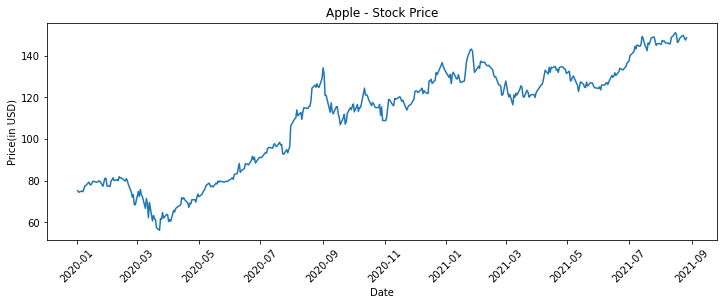

In [121]:
plt.figure(figsize = (12,4))
plt.plot(Apple_data)
plt.xticks(rotation = 45)
plt.title('Apple - Stock Price')
plt.xlabel('Date')
plt.ylabel('Price(in USD)')
plt.show()

**MACD** stands for Moving Average convergence/Divergence. It is a momentum indicator, that is it tells the general direction of stock in short to medium term.

A few principles of MACD trading strategy:-

We will calculate some exponential moving averages with window size 12 and 26. 

MACD line gives us the short to medium term trend of the price action(whether stock is going up, down, sideways)

Signal line is 9 month exponential moving average of MACD line, so its just smoothened version of MACD line. 

In [98]:
#Calculate short term exponential moving average
ShortEMA = Apple_data.ewm(span = 12, adjust = False).mean()

#Calculate long term exponential moving average
LongEMA = Apple_data.ewm(span = 26, adjust = False).mean()

#MACD line
MACD = ShortEMA - LongEMA
Apple_data['MACD'] = MACD

#Signal Line
signal = MACD.ewm(span = 9, adjust = False).mean()
Apple_data['Signal'] = signal

<IPython.core.display.Javascript object>


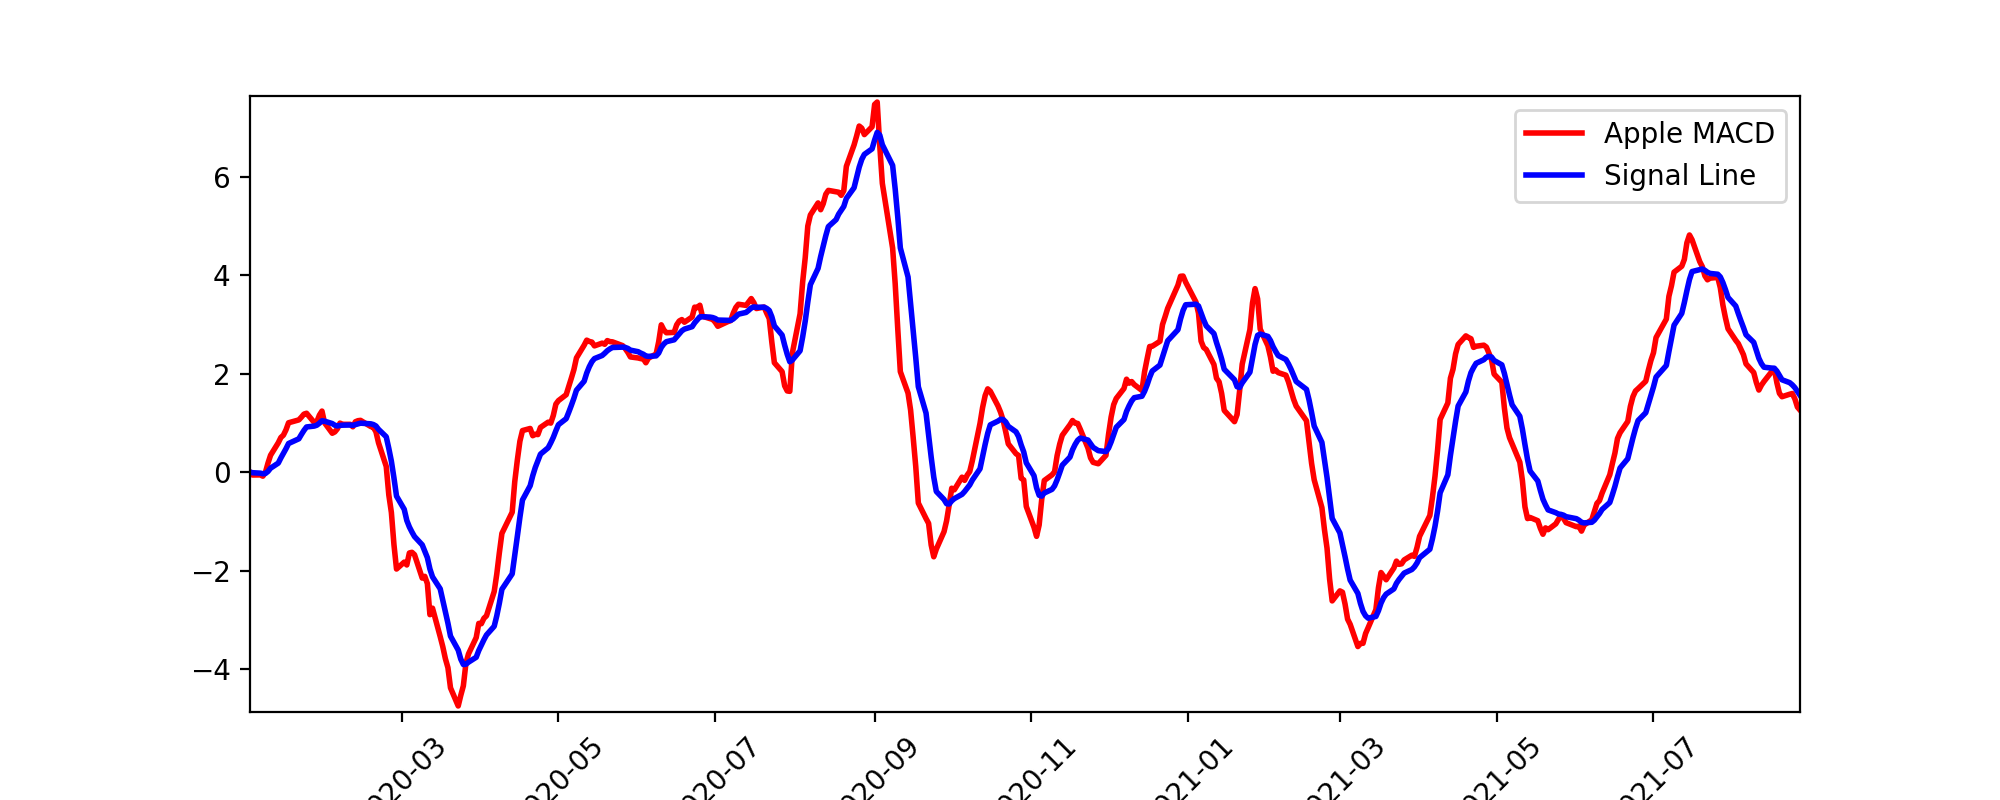

In [124]:
plt.figure(figsize = (10,4))
plt.plot(Apple_data.index,MACD,label = 'Apple MACD',color = 'red', linewidth = 2)
plt.plot(Apple_data.index,signal,label = 'Signal Line', color = 'blue', linewidth = 2)
plt.xticks(rotation = 45)
plt.legend()
plt.margins(x=0, y=0.01)
plt.show()

**MACD** trading strategy can be used as a buy or sell signal:-

**Buy** when **MACD line** crosses above the **Signal Line** <br>
**Sell** when **MACD line** crosses below the **Signal Line**


**Pandas is the bread and butter of data analysis when it comes to tabular data. Play with it functionalities on your own to get a hang of it. We will be using operations like filter, null value imputation a lot in data cleaning**
